In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
dfs = pd.read_excel("SetDatosCreditos.xlsx", sheet_name="datos")

In [3]:
x = dfs[["edad","ahorro"]]
x

,edad,ahorro
0,78,117.0
1,54,81.0
2,37,63.0
3,32,32.0
4,62,93.0
...,...,...
94,76,114.0
95,54,81.0
96,84,126.0
97,43,64.5


In [5]:
y = dfs["credito"]
y

0       0.0
1     243.0
2     189.0
3      96.0
4     279.0
      ...  
94    342.0
95      8.0
96    378.0
97    193.5
98    249.0
Name: credito, Length: 99, dtype: float64

In [6]:
#Particiono el set de datos en entrenamiento y pruebas
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
print(len(dfs))

99


In [8]:
print(len(x_train))


69


In [9]:
print(len(x_test))

30


In [13]:
#instancio mi modelo de reg lineal
model = linear_model.LinearRegression()

In [14]:
#Entreno el modelo CON LOS DATOS DE ENTRENAMIENTO
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Calculo las predicciones CON LOS DATOS DE PRUEBA

In [15]:
model.coef_

array([1.10181418, 1.83335497])

In [16]:
model.intercept_

4.017142207364941

In [17]:
x_test

,edad,ahorro
92,76,114.0
83,36,54.0
32,40,60.0
80,70,105.0
78,85,127.5
17,21,65.0
35,25,37.5
81,36,54.0
88,28,42.0
91,60,90.0


In [18]:
#Calculo las predicciones con LOS DATOS DE TEST
predicted = model.predict(x_test)

In [19]:
predicted

array([296.75748705, 142.68362134, 158.09100791, 273.64640719,
       331.42410683, 146.32331335, 100.31330827, 142.68362134,
       111.8688482 , 235.12794076, 308.31302697, 273.64640719,
       111.8688482 , 296.75748705, 136.0997542 , 212.01686091,
       111.8688482 , 173.49839448, 296.75748705, 146.53546798,
       160.28563029, 316.01672026, 223.57240084, 138.8317747 ,
       227.42424748, 196.60947434, 138.8317747 , 262.09086726,
       158.09100791, 247.6361821 ])

In [24]:
mse = sum((y_test-predicted)**2)/len(y_test)
mse

1028.0104136643577

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mse2 = mean_squared_error(y_test,predicted)
mse2

1028.0104136643579

In [28]:
import matplotlib.pyplot as plt


([array([4., 7., 4., 2., 3., 2., 5., 2., 1., 0.]),
  array([4., 1., 7., 3., 1., 4., 1., 3., 3., 3.])],
 array([100.31330827, 128.53197745, 156.75064662, 184.96931579,
        213.18798496, 241.40665414, 269.62532331, 297.84399248,
        326.06266165, 354.28133083, 382.5       ]),
 <a list of 2 Lists of Patches objects>)

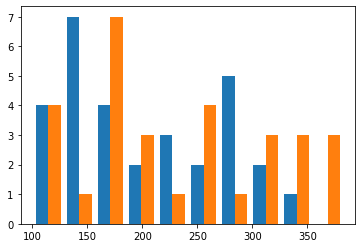

In [29]:
plt.hist([predicted,y_test])

In [30]:
model.score(x_test,y_test)

0.8503365154217913